In [46]:
import ee
import geemap
import matplotlib.pyplot as plt

In [2]:
ee.Authenticate()


Successfully saved authorization token.


In [3]:
ee.Initialize()

In [2]:
#4/1AfJohXn0BaoiSNC6zT3ejAv67YEvN72hiDh63aOvKy5-xqlCsp-QVUH7b7g

In [4]:
def mask_s2_clouds(image):
  """Masks clouds in a Sentinel-2 image using the QA band.

  Args:
      image (ee.Image): A Sentinel-2 image.

  Returns:
      ee.Image: A cloud-masked Sentinel-2 image.
  """
  qa = image.select('QA60')

  # Bits 10 and 11 are clouds and cirrus, respectively.
  cloud_bit_mask = 1 << 10
  cirrus_bit_mask = 1 << 11

  # Both flags should be set to zero, indicating clear conditions.
  mask = (
      qa.bitwiseAnd(cloud_bit_mask)
      .eq(0)
      .And(qa.bitwiseAnd(cirrus_bit_mask).eq(0))
  )

  return image.updateMask(mask).divide(10000)

In [37]:
dataset = (
    ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
    .filterDate('2020-01-01', '2020-01-30')
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))
    .map(mask_s2_clouds)
)

visualization = {
    'min': 0.0,
    'max': 0.3,
    'bands': ['B8A'],
}

m = geemap.Map()
m.set_center(8.6512, 49.8728, 11)
m.add_layer(dataset.mean(), visualization, 'RGB')

In [43]:
aoi = ee.Geometry.Polygon(
    [[[-110.8, 44.7], [-110.8, 44.6], [-110.6, 44.6], [-110.6, 44.7]]], None, False
)
img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_038029_20180810').select(['B4', 'B5', 'B6'])


In [44]:
rgb_img = geemap.ee_to_numpy(img, region=aoi)
print(rgb_img.shape)

(373, 531, 3)


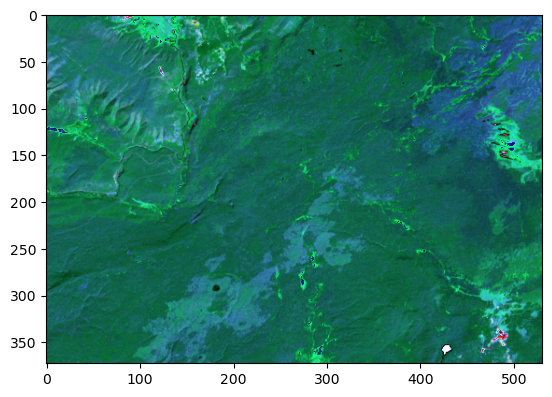

In [47]:
rgb_img_test = (255 * ((rgb_img[:, :, 0:3] - 100) / 3500)).astype('uint8')
plt.imshow(rgb_img_test)
plt.show()